<a href="https://colab.research.google.com/github/nbeeeel/Data-Loading/blob/main/Object-Detection/Processing_%26_Visualizing_(Object_Detection)_Yolo_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Importing the packages**

In [ ]:
import torch
from IPython.display import Image  # for displaying images
import os 
import random
import shutil
from sklearn.model_selection import train_test_split
import xml.etree.ElementTree as ET
from xml.dom import minidom
from tqdm import tqdm
from PIL import Image, ImageDraw
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#**Loading the saved txt annotations** 

In [ ]:
class_name_to_id_mapping = {"bicho_mineiro":0,"ferrugem":1}

In [ ]:
class_id_to_name_mapping = dict(zip(class_name_to_id_mapping.values(), class_name_to_id_mapping.keys()))

In [ ]:
class_id_to_name_mapping.keys()

dict_keys([0, 1])

In [ ]:
annotation='/content/drive/MyDrive/Projects/TensorFlow3/Dataset/Miner/Annot_txt'
images='/content/drive/MyDrive/Projects/TensorFlow3/Dataset/Miner/images'

In [ ]:
annotations = [os.path.join('/content/drive/MyDrive/Projects/TensorFlow3/Dataset/Miner/Annot_txt/', x) for x in os.listdir('/content/drive/MyDrive/Projects/TensorFlow3/Dataset/Miner/Annot_txt/') if x[-3:] == "txt"]

In [ ]:
annotations

['/content/drive/MyDrive/Projects/TensorFlow3/Dataset/Miner/Annot_txt/bicho_mineiro0.txt',
 '/content/drive/MyDrive/Projects/TensorFlow3/Dataset/Miner/Annot_txt/bicho_mineiro1.txt',
 '/content/drive/MyDrive/Projects/TensorFlow3/Dataset/Miner/Annot_txt/bicho_mineiro103.txt',
 '/content/drive/MyDrive/Projects/TensorFlow3/Dataset/Miner/Annot_txt/bicho_mineiro100.txt',
 '/content/drive/MyDrive/Projects/TensorFlow3/Dataset/Miner/Annot_txt/bicho_mineiro102.txt',
 '/content/drive/MyDrive/Projects/TensorFlow3/Dataset/Miner/Annot_txt/bicho_mineiro104.txt',
 '/content/drive/MyDrive/Projects/TensorFlow3/Dataset/Miner/Annot_txt/bicho_mineiro10.txt',
 '/content/drive/MyDrive/Projects/TensorFlow3/Dataset/Miner/Annot_txt/bicho_mineiro101.txt',
 '/content/drive/MyDrive/Projects/TensorFlow3/Dataset/Miner/Annot_txt/bicho_mineiro109.txt',
 '/content/drive/MyDrive/Projects/TensorFlow3/Dataset/Miner/Annot_txt/bicho_mineiro106.txt',
 '/content/drive/MyDrive/Projects/TensorFlow3/Dataset/Miner/Annot_txt/bicho

In [ ]:
annott=[]
for annot in os.listdir(annotation):
  annott.append(annot)

In [ ]:
imgs=[]
for img in os.listdir(images):
  imgs.append(img)

#**Visualizing Bounding Boxes to Validate the text annotations**

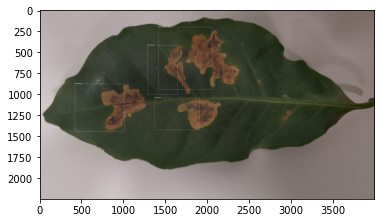

In [ ]:
def plot_bounding_box(image, annotation_list):
    annotations = np.array(annotation_list)
    w, h = image.size
    
    plotted_image = ImageDraw.Draw(image)

    transformed_annotations = np.copy(annotations)
    transformed_annotations[:,[1,3]] = annotations[:,[1,3]] * w
    transformed_annotations[:,[2,4]] = annotations[:,[2,4]] * h 
    
    transformed_annotations[:,1] = transformed_annotations[:,1] - (transformed_annotations[:,3] / 2)
    transformed_annotations[:,2] = transformed_annotations[:,2] - (transformed_annotations[:,4] / 2)
    transformed_annotations[:,3] = transformed_annotations[:,1] + transformed_annotations[:,3]
    transformed_annotations[:,4] = transformed_annotations[:,2] + transformed_annotations[:,4]
    
    for ann in transformed_annotations:
        obj_cls, x0, y0, x1, y1 = ann
        plotted_image.rectangle(((x0,y0), (x1,y1)))
        
        plotted_image.text((x0, y0 - 10), class_id_to_name_mapping[(int(obj_cls))])
    
    plt.imshow(np.array(image))
    plt.show()

# Get any random annotation file 
annotation_file = random.choice(annotations)
with open(annotation_file, "r") as file:
    annotation_list = file.read().split("\n")[:-1]
    annotation_list = [x.split(" ") for x in annotation_list]
    annotation_list = [[float(y) for y in x ] for x in annotation_list]

#Get the corresponding image file
image_file = annotation_file.replace("Annot_txt", "images").replace("txt", "jpg")
assert os.path.exists(image_file)

#Load the image
image = Image.open(image_file)

#Plot the Bounding Box
plot_bounding_box(image, annotation_list)

#**Splitting the Dataset**

In [ ]:
# Read images and annotations
images = [os.path.join(images1, x) for x in os.listdir(images1)]
annotations = [os.path.join(annotations1, x) for x in os.listdir(annotations1) if x[-3:] == "txt"]

images.sort()
annotations.sort()

# Split the dataset into train-valid-test splits 
train_images, val_images, train_annotations, val_annotations = train_test_split(images, annotations, test_size = 0.2, random_state = 1)
val_images, test_images, val_annotations, test_annotations = train_test_split(val_images, val_annotations, test_size = 0.5, random_state = 1)

In [ ]:
os.chdir('/content/drive/MyDrive/Projects/TensorFlow3/Dataset')

In [ ]:
os.mkdir('/content/drive/MyDrive/Projects/TensorFlow3/Dataset/Leaves/images/train')
os.mkdir('/content/drive/MyDrive/Projects/TensorFlow3/Dataset/Leaves/images/test')
os.mkdir('/content/drive/MyDrive/Projects/TensorFlow3/Dataset/Leaves/images/valid')
os.mkdir('/content/drive/MyDrive/Projects/TensorFlow3/Dataset/Leaves/Annot_txt/train')
os.mkdir('/content/drive/MyDrive/Projects/TensorFlow3/Dataset/Leaves/Annot_txt/test')
os.mkdir('/content/drive/MyDrive/Projects/TensorFlow3/Dataset/Leaves/Annot_txt/valid')

In [ ]:
#function to move images
def move_files_to_folder(files_list,destination_folder):
  for f in files_list:
    try:
      shutil.move(f,destination_folder)
    except:
      print(f)
      assert False

In [ ]:
#Moving the splits into their corresponding folders
move_files_to_folder(train_images,'/content/drive/MyDrive/Projects/TensorFlow3/Dataset/Leaves/images/train/')
move_files_to_folder(val_images,'/content/drive/MyDrive/Projects/TensorFlow3/Dataset/Leaves/images/valid/')
move_files_to_folder(test_images,'/content/drive/MyDrive/Projects/TensorFlow3/Dataset/Leaves/images/test/')
move_files_to_folder(train_annotations,'/content/drive/MyDrive/Projects/TensorFlow3/Dataset/Leaves/Annot_txt/train/')
move_files_to_folder(test_annotations,'/content/drive/MyDrive/Projects/TensorFlow3/Dataset/Leaves/Annot_txt/test/')
move_files_to_folder(val_annotations,'/content/drive/MyDrive/Projects/TensorFlow3/Dataset/Leaves/Annot_txt/valid/')

#**END-of-the-code**